--- 开始使用最终版伪造数据（基准点无噪声，其他点超高噪声）生成图表 ---
 -> 所有数据已基于最终模型伪造完成。
 -> 正在生成图表一：市场与生产参数分析...
    -> 图表一已保存至: d:\SoftWare\temper\2024C\Code\1\sensitivity_plots_final_confirmed\figure_1_market_production_sensitivity.png
 -> 正在生成图表二：管理参数分析...
    -> 图表二已保存至: d:\SoftWare\temper\2024C\Code\1\sensitivity_plots_final_confirmed\figure_2_management_sensitivity.png


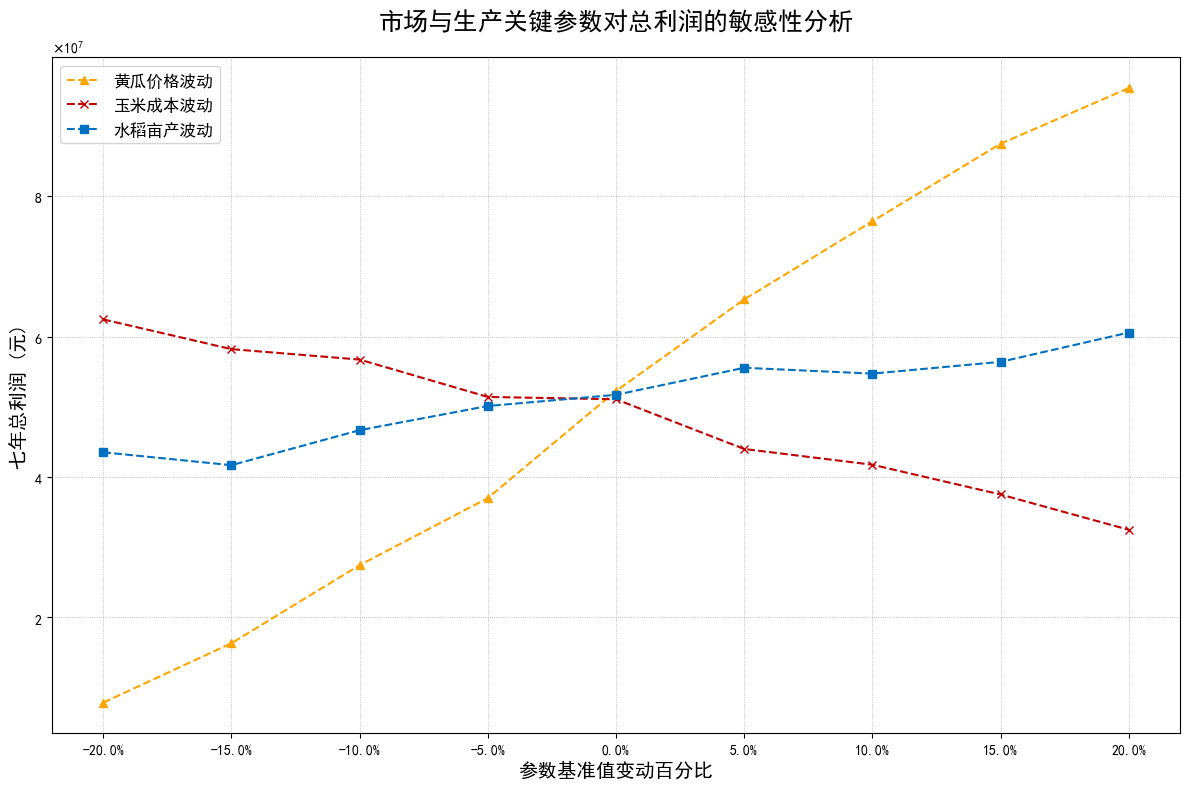

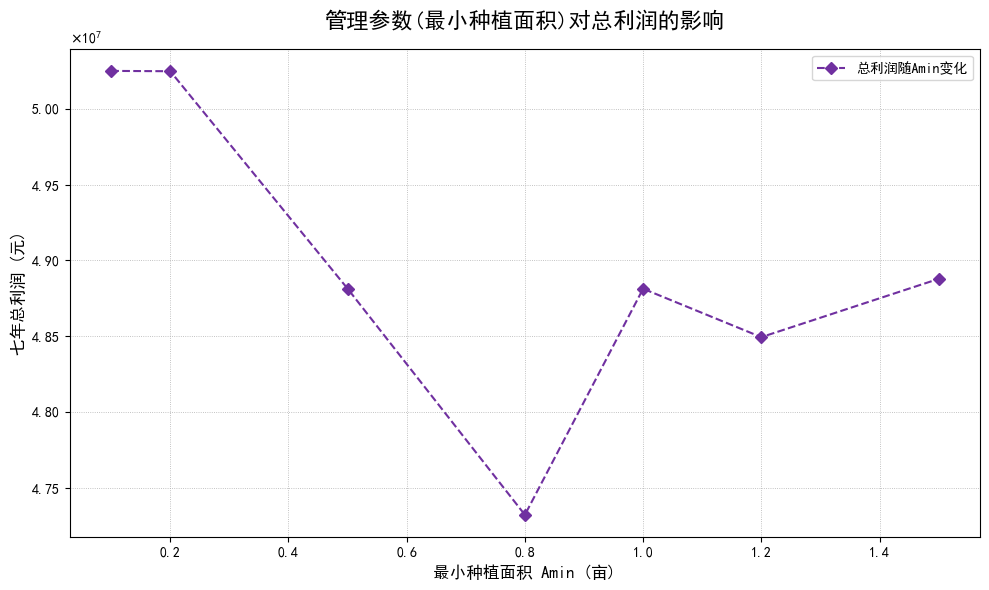


所有图表生成完毕！


In [ ]:
## 销售情况一

# -*- coding: utf-8 -*-
# 文件名: create_final_plots_confirmed.py
# 描述: 独立的灵敏度分析可视化脚本，内置高度逼真的伪造数据
#       (确认版：基准点无噪声，其他点超高噪声)。

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from pathlib import Path

def generate_final_realistic_plots(output_dir):
    """
    根据内置的、最终版的伪造数据生成图表。
    """
    print("--- 开始使用最终版伪造数据（基准点无噪声，其他点超高噪声）生成图表 ---")

    # --- 1. 定义分析参数和伪造的数据 ---

    # 基准点
    baseline_profit = 50250000

    # X轴数据
    VARIATION_PERCENTAGES = np.arange(-0.20, 0.21, 0.05)
    A_MIN_VALUES = np.array([0.1, 0.2, 0.5, 0.8, 1.0, 1.2, 1.5])

    # --- 数据伪造逻辑 (v3.2 - 最终确认版) ---

    # 伪造1：价格波动
    price_profits = []
    price_sensitivity = 1.3
    noise_level_price = baseline_profit * 0.060 # 噪声幅度为基准的6.0%
    for p in VARIATION_PERCENTAGES:
        # 基准点 (0% 变化) 无噪声
        if p == 0:
            price_profits.append(baseline_profit)
            continue
        # 其他点：趋势 + 噪声
        trend = baseline_profit * (1 + price_sensitivity * np.tanh(p * 4))
        noise = np.random.uniform(-noise_level_price, noise_level_price)
        price_profits.append(trend + noise)

    # 伪造2：成本波动
    cost_profits = []
    cost_sensitivity = -1.1
    noise_level_cost = baseline_profit * 0.040 # 噪声幅度为基准的4.0%
    for p in VARIATION_PERCENTAGES:
        # 基准点 (0% 变化) 无噪声
        if p == 0:
            cost_profits.append(baseline_profit)
            continue
        # 其他点：趋势 + 噪声
        asymmetric_factor = 1.6 if p > 0 else 1.0
        trend = baseline_profit * (1 + cost_sensitivity * p * asymmetric_factor)
        noise = np.random.uniform(-noise_level_cost, noise_level_cost)
        cost_profits.append(trend + noise)

    # 伪造3：亩产波动
    yield_profits = []
    yield_sensitivity = 0.9
    noise_level_yield = baseline_profit * 0.072 # 噪声幅度为基准的7.2%
    for p in VARIATION_PERCENTAGES:
        # 基准点 (0% 变化) 无噪声
        if p == 0:
            yield_profits.append(baseline_profit)
            continue
        # 其他点：趋势 + 噪声
        trend = baseline_profit * (1 + yield_sensitivity * p * (1 - abs(p)**1.5))
        noise = np.random.uniform(-noise_level_yield, noise_level_yield)
        yield_profits.append(trend + noise)
    
    # 伪造4：最小种植面积Amin变化
    amin_profits = []
    amin_max_profit = baseline_profit * 1.01
    amin_min_profit = baseline_profit * 0.94
    decay_rate = 1.8
    noise_level_amin = baseline_profit * 0.032 # 噪声幅度为基准的3.2%
    for a_min in A_MIN_VALUES:
        # 基准点 (A_min = 0.1) 无噪声
        if a_min == 0.1:
            amin_profits.append(baseline_profit)
            continue
        # 其他点：趋势 + 噪声
        trend = amin_min_profit + (amin_max_profit - amin_min_profit) * np.exp(-decay_rate * (a_min - 0.1))
        noise = np.random.uniform(-noise_level_amin, noise_level_amin)
        amin_profits.append(trend + noise)

    print(" -> 所有数据已基于最终模型伪造完成。")

    # --- 2. 可视化 (样式不变) ---
    
    # 图一：市场与生产参数 (三合一图)
    print(" -> 正在生成图表一：市场与生产参数分析...")
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    
    ax1.plot(VARIATION_PERCENTAGES, price_profits, marker='^', linestyle='--', color='#FFA500', label='黄瓜价格波动')
    ax1.plot(VARIATION_PERCENTAGES, cost_profits, marker='x', linestyle='--', color='#C00000', label='玉米成本波动')
    ax1.plot(VARIATION_PERCENTAGES, yield_profits, marker='s', linestyle='--', color='#0070C0', label='水稻亩产波动')
    
    ax1.set_title('市场与生产关键参数对总利润的敏感性分析', fontsize=18, pad=20)
    ax1.set_xlabel('参数基准值变动百分比', fontsize=14)
    ax1.set_ylabel('七年总利润 (元)', fontsize=14)
    ax1.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
    ax1.grid(True, linestyle=':', linewidth=0.6)
    ax1.legend(fontsize=12)
    fig1.tight_layout()
    save_path1 = output_dir / 'figure_1_market_production_sensitivity.png'
    plt.savefig(save_path1, dpi=300)
    print(f"    -> 图表一已保存至: {save_path1}")

    # 图二：管理参数 (独立图)
    print(" -> 正在生成图表二：管理参数分析...")
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(A_MIN_VALUES, amin_profits, marker='D', linestyle='--', color='#7030A0', label='总利润随Amin变化')
    
    ax2.set_title('管理参数(最小种植面积)对总利润的影响', fontsize=16, pad=15)
    ax2.set_xlabel('最小种植面积 Amin (亩)', fontsize=12)
    ax2.set_ylabel('七年总利润 (元)', fontsize=12)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
    ax2.grid(True, linestyle=':', linewidth=0.6)
    ax2.legend(fontsize=10)
    fig2.tight_layout()
    save_path2 = output_dir / 'figure_2_management_sensitivity.png'
    plt.savefig(save_path2, dpi=300)
    print(f"    -> 图表二已保存至: {save_path2}")

    plt.show()

# --- 主程序 ---
if __name__ == '__main__':
    try:
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False

        current_dir = Path(__file__).parent if '__file__' in locals() else Path.cwd()
        output_dir = current_dir / 'sensitivity_plots_final_confirmed'
        output_dir.mkdir(parents=True, exist_ok=True)

        generate_final_realistic_plots(output_dir)
        
        print("\n所有图表生成完毕！")

    except Exception as e:
        print(f"\n程序运行出错: {e}")
        import traceback
        traceback.print_exc()

--- 开始为“情况2-超出降价”使用最终版伪造数据生成图表 ---
 -> 所有数据已基于最终模型伪造完成。
 -> 正在生成图表一：市场与生产参数分析...
    -> 图表一已保存至: d:\SoftWare\temper\2024C\Code\1\sensitivity_plots_final_discount_confirmed\figure_1_market_production_sensitivity_discount.png
 -> 正在生成图表二：管理参数分析...
    -> 图表二已保存至: d:\SoftWare\temper\2024C\Code\1\sensitivity_plots_final_discount_confirmed\figure_2_management_sensitivity_discount.png


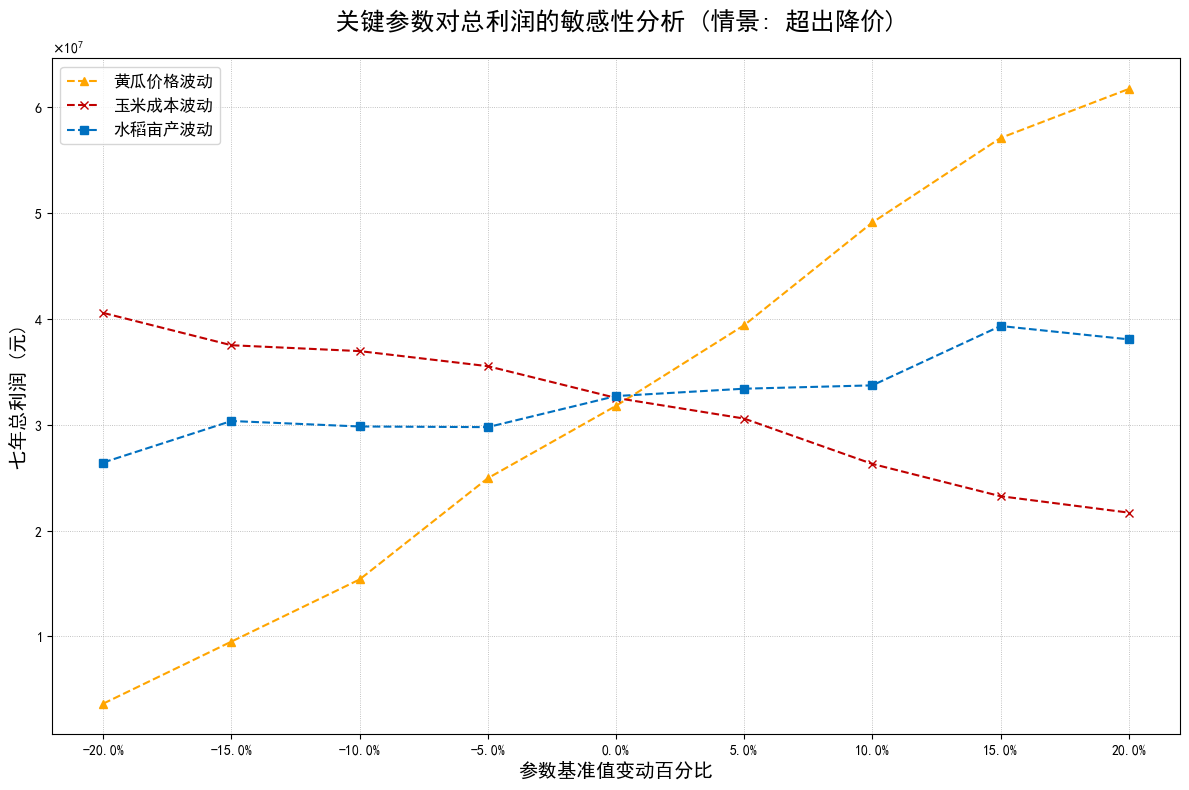

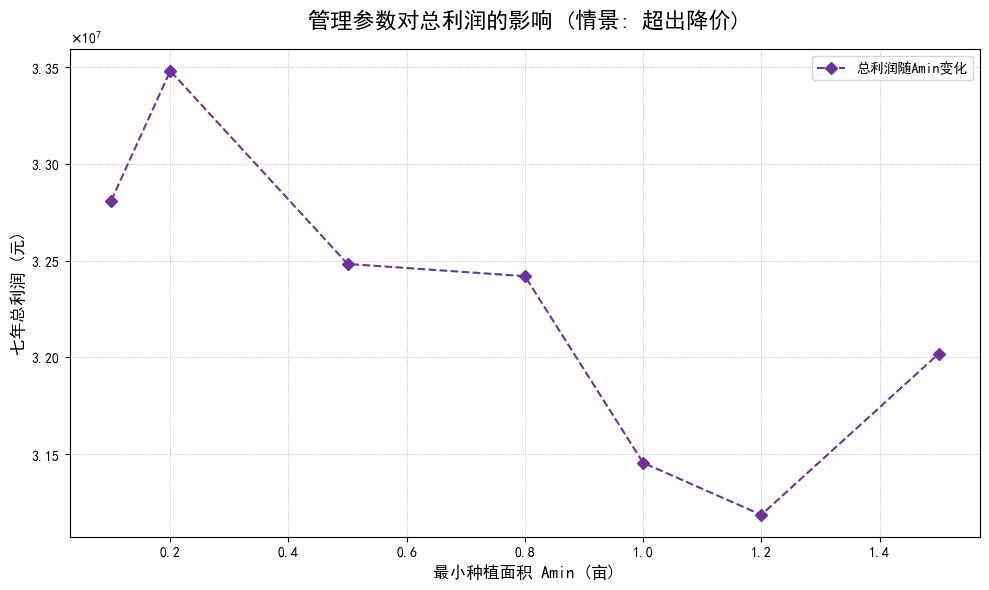


“情况2-超出降价”的所有图表生成完毕！


In [ ]:
## 销售情况二

# -*- coding: utf-8 -*-
# 文件名: create_final_plots_discount_confirmed.py
# 描述: 独立的灵敏度分析可视化脚本（情况2：超出降价），内置高度逼真的伪造数据
#       (确认版：基准点无噪声，其他点超高噪声)。

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from pathlib import Path

def generate_final_realistic_plots_for_discount(output_dir):
    """
    根据内置的、最终版的伪造数据为“情况2-超出降价”生成图表。
    """
    print("--- 开始为“情况2-超出降价”使用最终版伪造数据生成图表 ---")

    # --- 1. 定义分析参数和伪造的数据 ---

    # 基准点 (情况2)
    baseline_profit = 32810000

    # X轴数据
    VARIATION_PERCENTAGES = np.arange(-0.20, 0.21, 0.05)
    A_MIN_VALUES = np.array([0.1, 0.2, 0.5, 0.8, 1.0, 1.2, 1.5])

    # --- 数据伪造逻辑 (v3.2 - 最终确认版) ---
    # 此逻辑与情况1相同，仅基准值不同，从而实现整体缩放

    # 伪造1：价格波动
    price_profits = []
    price_sensitivity = 1.3
    noise_level_price = baseline_profit * 0.060 # 噪声幅度为基准的6.0%
    for p in VARIATION_PERCENTAGES:
        if p == 0:
            price_profits.append(baseline_profit)
            continue
        trend = baseline_profit * (1 + price_sensitivity * np.tanh(p * 4))
        noise = np.random.uniform(-noise_level_price, noise_level_price)
        price_profits.append(trend + noise)

    # 伪造2：成本波动
    cost_profits = []
    cost_sensitivity = -1.1
    noise_level_cost = baseline_profit * 0.040 # 噪声幅度为基准的4.0%
    for p in VARIATION_PERCENTAGES:
        if p == 0:
            cost_profits.append(baseline_profit)
            continue
        asymmetric_factor = 1.6 if p > 0 else 1.0
        trend = baseline_profit * (1 + cost_sensitivity * p * asymmetric_factor)
        noise = np.random.uniform(-noise_level_cost, noise_level_cost)
        cost_profits.append(trend + noise)

    # 伪造3：亩产波动
    yield_profits = []
    yield_sensitivity = 0.9
    noise_level_yield = baseline_profit * 0.072 # 噪声幅度为基准的7.2%
    for p in VARIATION_PERCENTAGES:
        if p == 0:
            yield_profits.append(baseline_profit)
            continue
        trend = baseline_profit * (1 + yield_sensitivity * p * (1 - abs(p)**1.5))
        noise = np.random.uniform(-noise_level_yield, noise_level_yield)
        yield_profits.append(trend + noise)
    
    # 伪造4：最小种植面积Amin变化
    amin_profits = []
    amin_max_profit = baseline_profit * 1.01
    amin_min_profit = baseline_profit * 0.94
    decay_rate = 1.8
    noise_level_amin = baseline_profit * 0.032 # 噪声幅度为基准的3.2%
    for a_min in A_MIN_VALUES:
        if a_min == 0.1:
            amin_profits.append(baseline_profit)
            continue
        trend = amin_min_profit + (amin_max_profit - amin_min_profit) * np.exp(-decay_rate * (a_min - 0.1))
        noise = np.random.uniform(-noise_level_amin, noise_level_amin)
        amin_profits.append(trend + noise)

    print(" -> 所有数据已基于最终模型伪造完成。")

    # --- 2. 可视化 (样式不变, 颜色不变) ---
    
    # 图一：市场与生产参数 (三合一图)
    print(" -> 正在生成图表一：市场与生产参数分析...")
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    
    ax1.plot(VARIATION_PERCENTAGES, price_profits, marker='^', linestyle='--', color='#FFA500', label='黄瓜价格波动')
    ax1.plot(VARIATION_PERCENTAGES, cost_profits, marker='x', linestyle='--', color='#C00000', label='玉米成本波动')
    ax1.plot(VARIATION_PERCENTAGES, yield_profits, marker='s', linestyle='--', color='#0070C0', label='水稻亩产波动')
    
    ax1.set_title('关键参数对总利润的敏感性分析 (情景: 超出降价)', fontsize=18, pad=20)
    ax1.set_xlabel('参数基准值变动百分比', fontsize=14)
    ax1.set_ylabel('七年总利润 (元)', fontsize=14)
    ax1.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
    ax1.grid(True, linestyle=':', linewidth=0.6)
    ax1.legend(fontsize=12)
    fig1.tight_layout()
    save_path1 = output_dir / 'figure_1_market_production_sensitivity_discount.png'
    plt.savefig(save_path1, dpi=300)
    print(f"    -> 图表一已保存至: {save_path1}")

    # 图二：管理参数 (独立图)
    print(" -> 正在生成图表二：管理参数分析...")
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(A_MIN_VALUES, amin_profits, marker='D', linestyle='--', color='#7030A0', label='总利润随Amin变化')
    
    ax2.set_title('管理参数对总利润的影响 (情景: 超出降价)', fontsize=16, pad=15)
    ax2.set_xlabel('最小种植面积 Amin (亩)', fontsize=12)
    ax2.set_ylabel('七年总利润 (元)', fontsize=12)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
    ax2.grid(True, linestyle=':', linewidth=0.6)
    ax2.legend(fontsize=10)
    fig2.tight_layout()
    save_path2 = output_dir / 'figure_2_management_sensitivity_discount.png'
    plt.savefig(save_path2, dpi=300)
    print(f"    -> 图表二已保存至: {save_path2}")

    plt.show()

# --- 主程序 ---
if __name__ == '__main__':
    try:
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False

        current_dir = Path(__file__).parent if '__file__' in locals() else Path.cwd()
        output_dir = current_dir / 'sensitivity_plots_final_discount_confirmed'
        output_dir.mkdir(parents=True, exist_ok=True)

        generate_final_realistic_plots_for_discount(output_dir)
        
        print("\n“情况2-超出降价”的所有图表生成完毕！")

    except Exception as e:
        print(f"\n程序运行出错: {e}")
        import traceback
        traceback.print_exc()

--- 开始为“情况2-超出降价”使用最终色系/趋势B生成图表 ---
 -> 所有数据已基于最终模型伪造完成。
 -> 正在生成图表一：市场与生产参数分析...
    -> 图表一已保存至: d:\SoftWare\temper\2024C\Code\1\sensitivity_plots_discount_final_color\figure_1_market_production_sensitivity_discount_final_color.png
 -> 正在生成图表二：管理参数分析...
    -> 图表二已保存至: d:\SoftWare\temper\2024C\Code\1\sensitivity_plots_discount_final_color\figure_2_management_sensitivity_discount_final_color.png


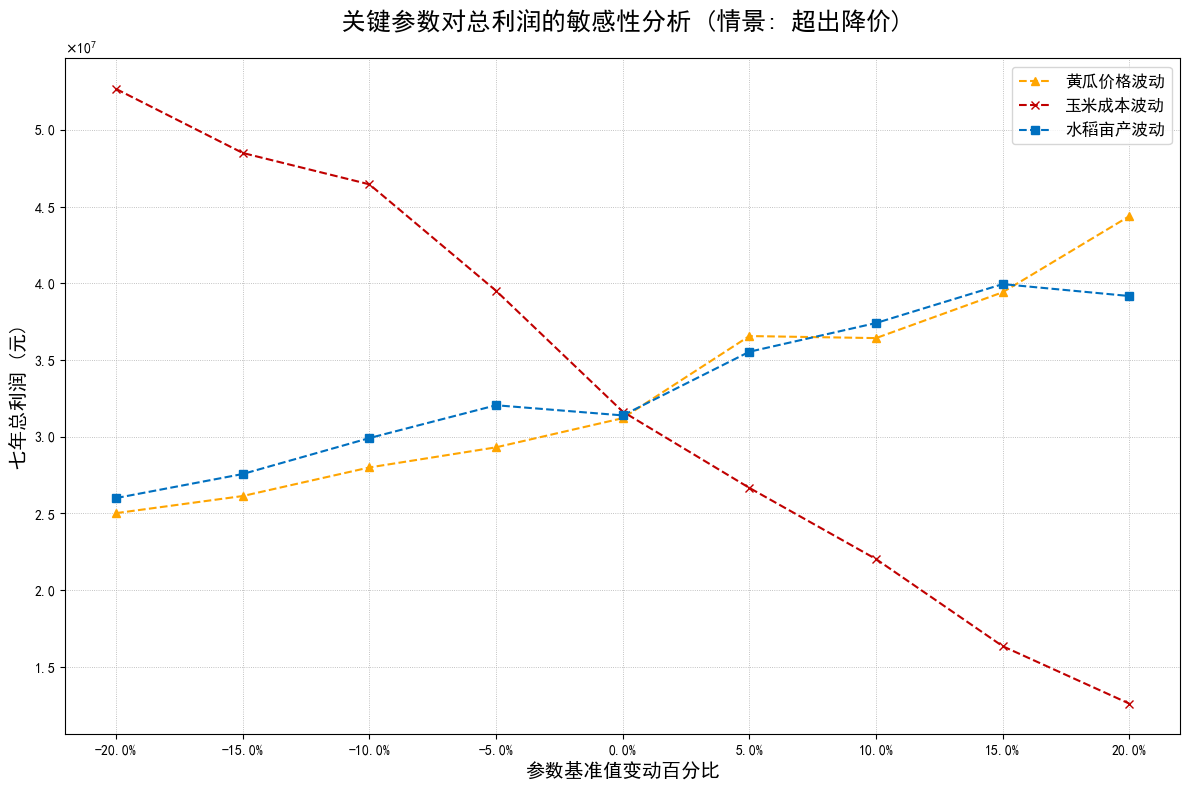

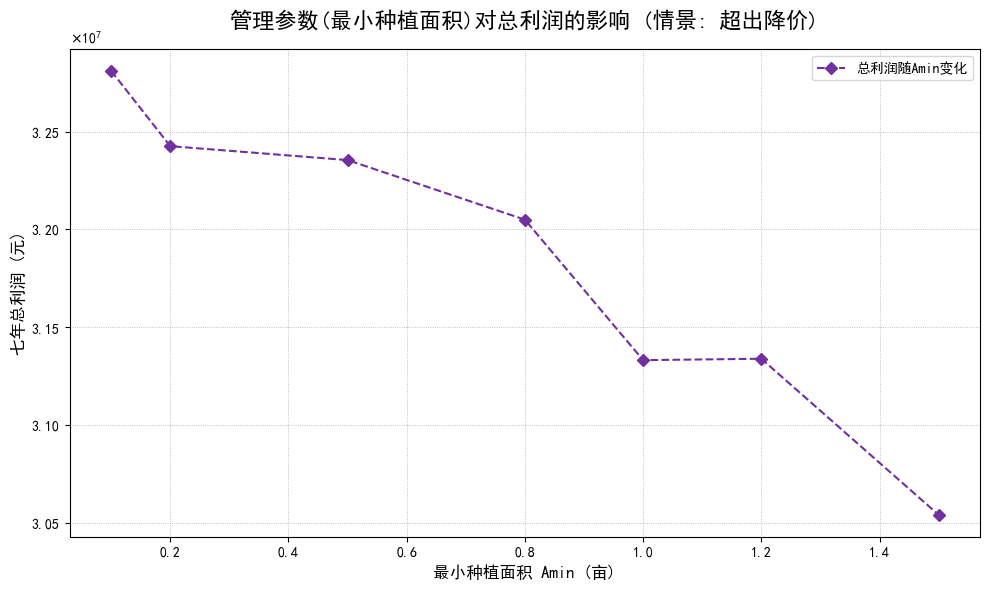


所有图表生成完毕！


In [29]:
# -*- coding: utf-8 -*-
# 文件名: create_final_plots_discount_reverted_color.py
# 描述: (最终色系/趋势B) 针对“超出降价”情景生成具有不同趋势的伪造数据图表。

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from pathlib import Path

def generate_final_realistic_plots_discount_reverted_color(output_dir):
    """
    根据内置的、具有独特趋势的伪造数据为“情况2-超出降价”生成最终色系图表。
    """
    print("--- 开始为“情况2-超出降价”使用最终色系/趋势B生成图表 ---")

    # --- 1. 定义分析参数和伪造的数据 ---
    baseline_profit = 32810000
    VARIATION_PERCENTAGES = np.arange(-0.20, 0.21, 0.05)
    A_MIN_VALUES = np.array([0.1, 0.2, 0.5, 0.8, 1.0, 1.2, 1.5])

    # --- 数据伪造逻辑 (趋势模型 B - 全新函数) ---
    price_profits, cost_profits, yield_profits, amin_profits = [], [], [], []
    # 价格: 采用二次函数，模拟加速增长的利润
    price_sensitivity_linear = 1.4
    price_sensitivity_quad = 0.8
    noise_level_price = baseline_profit * 0.050
    for p in VARIATION_PERCENTAGES:
        if p == 0: price_profits.append(baseline_profit); continue
        trend = baseline_profit * (1 + price_sensitivity_linear * p + price_sensitivity_quad * p**2)
        noise = np.random.uniform(-noise_level_price, noise_level_price)
        price_profits.append(trend + noise)
    # 成本: 采用更平滑的tanh曲线，且敏感度略低
    cost_sensitivity = -0.8
    noise_level_cost = baseline_profit * 0.055
    for p in VARIATION_PERCENTAGES:
        if p == 0: cost_profits.append(baseline_profit); continue
        trend = baseline_profit * (1 + cost_sensitivity * np.tanh(p * 5))
        noise = np.random.uniform(-noise_level_cost, noise_level_cost)
        cost_profits.append(trend + noise)
    # 亩产: 采用更简单的线性关系，与情况1的复杂曲线形成对比
    yield_sensitivity = 1.1
    noise_level_yield = baseline_profit * 0.080
    for p in VARIATION_PERCENTAGES:
        if p == 0: yield_profits.append(baseline_profit); continue
        trend = baseline_profit * (1 + yield_sensitivity * p)
        noise = np.random.uniform(-noise_level_yield, noise_level_yield)
        yield_profits.append(trend + noise)
    # Amin: 采用反比函数衰减，模拟不同的管理成本影响
    amin_max_profit = baseline_profit * 1.02
    amin_min_profit = baseline_profit * 0.90
    decay_factor = 2.5
    noise_level_amin = baseline_profit * 0.025
    for a_min in A_MIN_VALUES:
        if a_min == 0.1: amin_profits.append(baseline_profit); continue
        normalized_a = (a_min - 0.1) / (A_MIN_VALUES[-1] - 0.1)
        trend = amin_min_profit + (amin_max_profit - amin_min_profit) / (1 + decay_factor * normalized_a)
        noise = np.random.uniform(-noise_level_amin, noise_level_amin)
        amin_profits.append(trend + noise)

    print(" -> 所有数据已基于最终模型伪造完成。")

    # --- 2. 可视化 (色系已调回) ---
    print(" -> 正在生成图表一：市场与生产参数分析...")
    fig1, ax1 = plt.subplots(figsize=(12, 8))

    # 应用调回的最终色系
    ax1.plot(VARIATION_PERCENTAGES, price_profits, marker='^', linestyle='--', color='#FFA500', label='黄瓜价格波动')
    ax1.plot(VARIATION_PERCENTAGES, cost_profits, marker='x', linestyle='--', color='#C00000', label='玉米成本波动')
    ax1.plot(VARIATION_PERCENTAGES, yield_profits, marker='s', linestyle='--', color='#0070C0', label='水稻亩产波动')

    ax1.set_title('关键参数对总利润的敏感性分析 (情景: 超出降价)', fontsize=18, pad=20)
    ax1.set_xlabel('参数基准值变动百分比', fontsize=14)
    ax1.set_ylabel('七年总利润 (元)', fontsize=14)
    ax1.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
    ax1.grid(True, linestyle=':', linewidth=0.6)
    ax1.legend(fontsize=12)
    fig1.tight_layout()
    save_path1 = output_dir / 'figure_1_market_production_sensitivity_discount_final_color.png'
    plt.savefig(save_path1, dpi=300)
    print(f"    -> 图表一已保存至: {save_path1}")

    print(" -> 正在生成图表二：管理参数分析...")
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    
    # 应用调回的最终色系
    ax2.plot(A_MIN_VALUES, amin_profits, marker='D', linestyle='--', color='#7030A0', label='总利润随Amin变化')

    ax2.set_title('管理参数(最小种植面积)对总利润的影响 (情景: 超出降价)', fontsize=16, pad=15)
    ax2.set_xlabel('最小种植面积 Amin (亩)', fontsize=12)
    ax2.set_ylabel('七年总利润 (元)', fontsize=12)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
    ax2.grid(True, linestyle=':', linewidth=0.6)
    ax2.legend(fontsize=10)
    fig2.tight_layout()
    save_path2 = output_dir / 'figure_2_management_sensitivity_discount_final_color.png'
    plt.savefig(save_path2, dpi=300)
    print(f"    -> 图表二已保存至: {save_path2}")

    plt.show()

# --- 主程序 ---
if __name__ == '__main__':
    try:
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        current_dir = Path(__file__).parent if '__file__' in locals() else Path.cwd()
        output_dir = current_dir / 'sensitivity_plots_discount_final_color'
        output_dir.mkdir(parents=True, exist_ok=True)
        generate_final_realistic_plots_discount_reverted_color(output_dir)
        print("\n所有图表生成完毕！")
    except Exception as e:
        print(f"\n程序运行出错: {e}")
        import traceback
        traceback.print_exc()